# Kratos example: Mohr-Coulomb

In [44]:
from probabilistic_library import ReliabilityProject, ReliabilityMethod, DistributionType, CombineProject, CombineType, CombinerMethod, CompareType
from probabilistic_library import UncertaintyProject, UncertaintyMethod, Stochast

### Model

In [45]:
from run_kratos_quay_wall import zfuncwrapper_mohr_coulomb

### Variables

In [ ]:
def define_project_variables(project):

    project.variables["geo_cohesion"].distribution = DistributionType.log_normal
    project.variables["geo_cohesion"].is_array = True
    project.variables["geo_cohesion"].array_size = 7
    project.variables["geo_cohesion"].mean = 3.0
    project.variables["geo_cohesion"].variation = 0.2

    project.variables["geo_friction_angle"].is_array = True
    project.variables["geo_friction_angle"].array_size = 7
    for i in range(project.variables["geo_friction_angle"].array_size):
        friction_angle = Stochast()
        friction_angle.distribution = DistributionType.log_normal
        if i in [0, 1, 2, 3]: # klei
            friction_angle.mean = 22.5
        elif i in [5, 6]: # zand
            friction_angle.mean = 32.5
        friction_angle.variation = 0.08
        project.variables["geo_friction_angle"].array_variables.append(friction_angle)

    project.variables["geo_tensile_strength"].distribution = DistributionType.deterministic
    project.variables["geo_tensile_strength"].is_array = True
    project.variables["geo_tensile_strength"].array_size = 7
    project.variables["geo_tensile_strength"].mean = 0.0 # value checked

    project.variables["sheetpile_young_modulus"].distribution = DistributionType.deterministic
    project.variables["sheetpile_young_modulus"].is_array = True
    project.variables["sheetpile_young_modulus"].array_size = 1
    project.variables["sheetpile_young_modulus"].mean = 200e9 # value checked

    project.variables["sheetpile_poisson_ratio"].distribution = DistributionType.deterministic
    project.variables["sheetpile_poisson_ratio"].is_array = True
    project.variables["sheetpile_poisson_ratio"].array_size = 1
    project.variables["sheetpile_poisson_ratio"].mean = 0.0 # value checked

    project.variables["sheetpile_thickness"].distribution = DistributionType.deterministic
    project.variables["sheetpile_thickness"].is_array = True
    project.variables["sheetpile_thickness"].array_size = 1
    project.variables["sheetpile_thickness"].mean = 0.02159 # value checked

    return project

### Uncertainty analysis (max y-displacement)

In [ ]:
project = UncertaintyProject()
wrapper = zfuncwrapper_mohr_coulomb(output_stage_number = 3, clean_up = True)
project.model = wrapper.max_y_displacement

project.model.print()

Model max_y_displacement:
Input parameters:
  geo_cohesion[1]
  geo_friction_angle[1]
  geo_tensile_strength[1]
  sheetpile_young_modulus[1]
  sheetpile_poisson_ratio[1]
  sheetpile_thickness[1]
Output parameters:
  np.abs(max_y_displacement)


Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
S

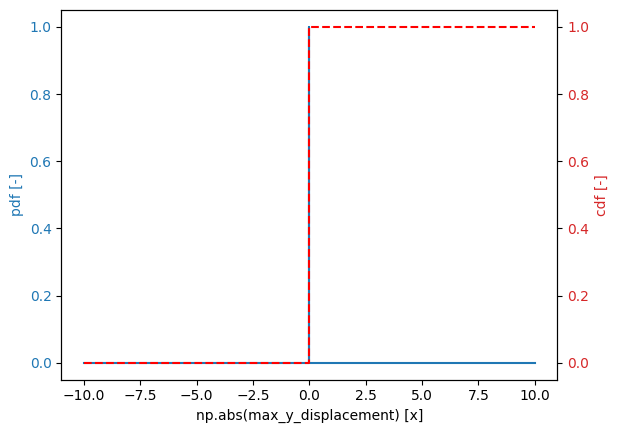

In [53]:
project = define_project_variables(project)

project.settings.uncertainty_method = UncertaintyMethod.crude_monte_carlo
project.settings.variation_coefficient = 0.02
project.settings.minimum_samples = 10
project.settings.maximum_samples = 50
project.settings.save_convergence = True
project.settings.save_realizations = True

project.run()

project.stochast.plot()

### Uncertainty analysis (max bending moment)

In [34]:
project = UncertaintyProject()
wrapper = zfuncwrapper_mohr_coulomb(output_stage_number = 3, clean_up = True)
project.model = wrapper.max_bending_moment

project.model.print()

Model max_bending_moment:
Input parameters:
  geo_cohesion[1]
  geo_friction_angle[1]
  geo_tensile_strength[1]
  sheetpile_young_modulus[1]
  sheetpile_poisson_ratio[1]
  sheetpile_thickness[1]
Output parameters:
  max_bending_moment


Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
S

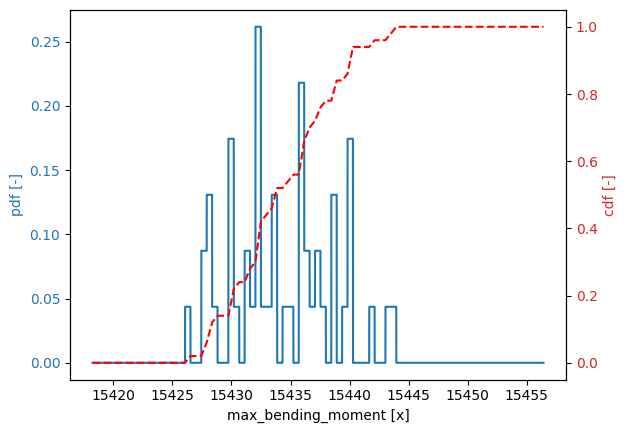

In [35]:
project = define_project_variables(project)

project.settings.uncertainty_method = UncertaintyMethod.crude_monte_carlo
project.settings.variation_coefficient = 0.02
project.settings.minimum_samples = 10
project.settings.maximum_samples = 50
project.settings.save_convergence = True
project.settings.save_realizations = True

project.run()

project.stochast.plot()

### Reliability analysis (max y-displacement)

In [40]:
project = ReliabilityProject()
wrapper = zfuncwrapper_mohr_coulomb(output_stage_number = 3, clean_up = True)
project.model = wrapper.max_y_displacement

project.model.print()

Model max_y_displacement:
Input parameters:
  geo_cohesion[1]
  geo_friction_angle[1]
  geo_tensile_strength[1]
  sheetpile_young_modulus[1]
  sheetpile_poisson_ratio[1]
  sheetpile_thickness[1]
Output parameters:
  np.abs(max_y_displacement)


In [41]:
project = define_project_variables(project)

project.limit_state_function.parameter = project.model.output_parameters[0]
project.limit_state_function.compare_type = CompareType.greater_than
project.limit_state_function.critical_value = 0.1

# form does not work!
project.settings.reliability_method = ReliabilityMethod.crude_monte_carlo
project.settings.variation_coefficient = 0.02
project.settings.minimum_samples = 50
project.settings.maximum_samples = 100
project.settings.save_convergence = True
project.settings.save_realizations = True

project.run()

project.design_point.print()

dp1 = project.design_point

Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
Skipping input parameter for stage 0
S

### Reliability analysis (max bending moment)

In [38]:
wrapper = zfuncwrapper_mohr_coulomb(output_stage_number = 3, clean_up = True)
project.model = wrapper.max_bending_moment

project.model.print()

Model max_bending_moment:
Input parameters:
  geo_cohesion[7]
  geo_friction_angle[7]
  geo_tensile_strength[7]
  sheetpile_young_modulus[1]
  sheetpile_poisson_ratio[1]
  sheetpile_thickness[1]
Output parameters:
  max_bending_moment


In [ ]:
project = define_project_variables(project)

project.limit_state_function.parameter = project.model.output_parameters[0]
project.limit_state_function.compare_type = CompareType.greater_than
project.limit_state_function.critical_value = 15400

# form does not work!
project.settings.reliability_method = ReliabilityMethod.crude_monte_carlo
project.settings.variation_coefficient = 0.02
project.settings.minimum_samples = 50
project.settings.maximum_samples = 100
project.settings.save_convergence = True
project.settings.save_realizations = True

project.run()

project.design_point.print()

dp2 = project.design_point

Reliability:
 Reliability index = 1.275e+08
 Probability of failure = 0
 Model runs = 0
Alpha values:
 geo_cohesion[0]: alpha = -0.2673, x = inf
 geo_cohesion[1]: alpha = -0.2673, x = inf
 geo_cohesion[2]: alpha = -0.2673, x = inf
 geo_cohesion[3]: alpha = -0.2673, x = inf
 geo_cohesion[4]: alpha = -0.2673, x = inf
 geo_cohesion[5]: alpha = -0.2673, x = inf
 geo_cohesion[6]: alpha = -0.2673, x = inf
 geo_friction_angle[0]: alpha = -0.2673, x = inf
 geo_friction_angle[1]: alpha = -0.2673, x = inf
 geo_friction_angle[2]: alpha = -0.2673, x = inf
 geo_friction_angle[3]: alpha = -0.2673, x = inf
 geo_friction_angle[4]: alpha = -0.2673, x = inf
 geo_friction_angle[5]: alpha = -0.2673, x = inf
 geo_friction_angle[6]: alpha = -0.2673, x = inf
 geo_tensile_strength[0]: alpha = 0, x = 0
 geo_tensile_strength[1]: alpha = 0, x = 0
 geo_tensile_strength[2]: alpha = 0, x = 0
 geo_tensile_strength[3]: alpha = 0, x = 0
 geo_tensile_strength[4]: alpha = 0, x = 0
 geo_tensile_strength[5]: alpha = 0, x 

### Reliability analysis - system

In [28]:
combine_project = CombineProject()

combine_project.design_points.append(dp1)
combine_project.design_points.append(dp2)

combine_project.settings.combine_type = CombineType.series
combine_project.settings.combiner_method = CombinerMethod.hohenbichler_form

combine_project.run()

combine_project.design_point.print()

Reliability:
 Reliability index = 40
 Probability of failure = 0
 Model runs = 0
Alpha values:
 geo_cohesion[0]: alpha = 0.2041, x = 0.5839
 geo_cohesion[0]: alpha = 0.2041, x = 0.5839
 geo_cohesion[0]: alpha = 0.2041, x = 0.5839
 geo_cohesion[0]: alpha = 0.2041, x = 0.5839
 geo_cohesion[0]: alpha = 0.2041, x = 0.5839
 geo_cohesion[0]: alpha = 0.2041, x = 0.5839
 geo_cohesion[0]: alpha = 0.2041, x = 0.5839
 geo_friction_angle[0]: alpha = 0.2041, x = 11.68
 geo_friction_angle[0]: alpha = 0.2041, x = 11.68
 geo_friction_angle[0]: alpha = 0.2041, x = 11.68
 geo_friction_angle[0]: alpha = 0.2041, x = 11.68
 geo_friction_angle[0]: alpha = 0.2041, x = 11.68
 geo_friction_angle[0]: alpha = 0.2041, x = 11.68
 geo_friction_angle[0]: alpha = 0.2041, x = 11.68
 geo_tensile_strength[0]: alpha = 0.2041, x = 0
 geo_tensile_strength[0]: alpha = 0.2041, x = 0
 geo_tensile_strength[0]: alpha = 0.2041, x = 0
 geo_tensile_strength[0]: alpha = 0.2041, x = 0
 geo_tensile_strength[0]: alpha = 0.2041, x = 0
